# <center><font color= blue > 606 - CAPSTONE PROJECT </font></center>

##<center><font color= blue > PREDICTING SALES FOR MULTIPLE WALMART STORES </font></center>
### <center><font color= orange > ~ David Gill </font>







### <b>Importing Required Libraries/Modules for Data Extraction, EDA - Exploratory Data Analysis, Data Manipulation/cleansing, ML Implementation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import visuals as vs
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames
#libraries to plot data
import matplotlib.pyplot as plt
import seaborn as sns
#libraries to standardize data and prepare test and train datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#libraries to implement ML
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
#Libraries for looking at random forest trees
from sklearn.tree import export_graphviz
import pydot
#libraries for validating models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score #Only used in classification models
import sklearn as sl
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### <b>Analyzing first csv file - Store.csv


In [162]:
from google.colab import files
uploaded = files.upload()

Saving stores.csv to stores (2).csv


In [163]:
df_Stores = pd.read_csv('stores.csv')   #Read csv file and viewing sample data
df_Stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [164]:
df_Stores.shape   #Number of Rows and Columns

(45, 3)

In [165]:
df_Stores.dtypes    #DataType of attributes

Store     int64
Type     object
Size      int64
dtype: object

In [0]:
df_Stores_Dup = df_Stores.duplicated()    #Checking for duplicates
#print(df_Stores_Dup)

In [167]:
df_Stores_Distinct = df_Stores['Type'].unique()   #Distinct Store types
df_Stores_Distinct

array(['A', 'B', 'C'], dtype=object)

In [168]:
df_Stores_groupby = df_Stores.groupby(['Type']).count()   #Count corresponding to each store
df_Stores_groupby

,Store,Size
Type,,
A,22,22
B,17,17
C,6,6


### <b>Pie Chart respresentation for store type

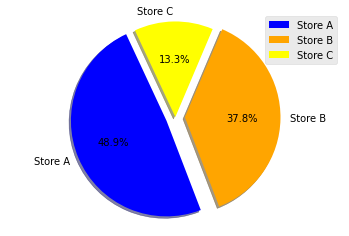

In [169]:
labels = 'Store A','Store B','Store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['blue', 'orange', 'yellow']
explode = (0.1, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=115)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

### <b>Box plot respresentation for store sizes

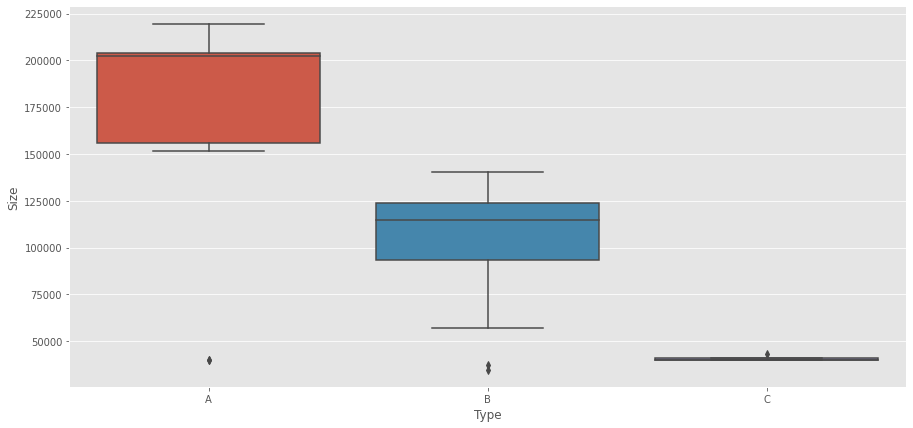

In [170]:
store_type = pd.concat([df_Stores['Type'], df_Stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

In [171]:
#df_Stores.isnull().values.any()     #Find missing values
df_Stores.isnull().sum().sum()

0

In [172]:
NAN_count = df_Stores.isnull().sum()    #Checking for NAN Values
NAN_count

Store    0
Type     0
Size     0
dtype: int64

### <b>EDA result for first file -

##### - It contains 45 Rows, for 45 stores 
##### - It contains 3 Columns/Attributes - <b>Store, Type, Size
##### - There are 3 distinct Store Types - <b> A, B, C, with A being the largest and C the smallest
##### - There is no overlapped area in the sizes of the stores
##### - There is no missing data in the file

### <b>Analyzing second csv file - Features.csv

In [173]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features (2).csv


In [174]:
df_Features = pd.read_csv('features.csv')   #Read csv file and viewing sample data
df_Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [175]:
df_Features.shape   #Number of Rows and Columns

(8190, 12)

In [176]:
df_Features.dtypes    #DataType of attributes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [177]:
df_Features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### <b>Filling NULL Values in Features with Mean And/Or Zero(0) 

In [178]:
#Finding Mean
df_Features.loc[:,"CPI"].mean() 

172.46080918276078

In [179]:
df_Features.loc[:,"Unemployment"].mean()

7.826821038790305

In [0]:
#Fill with Zero
df_Features['MarkDown1']=df_Features['MarkDown1'].fillna(0)
df_Features['MarkDown2']=df_Features['MarkDown2'].fillna(0)
df_Features['MarkDown3']=df_Features['MarkDown3'].fillna(0)
df_Features['MarkDown4']=df_Features['MarkDown4'].fillna(0)
df_Features['MarkDown5']=df_Features['MarkDown5'].fillna(0)

In [0]:
#Fill with Mean
df_Features.fillna(df_Features.loc[:,"CPI"].mean(), inplace=True)

In [182]:
df_Features.fillna(df_Features.loc[:,"Unemployment"].mean(), inplace=True)
df_Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


#### <b>Variation of Unemployment and CPI over Time

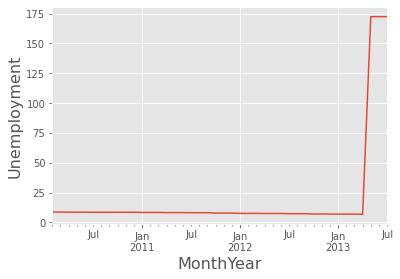

In [183]:
df_Features["MonthYear"] = pd.to_datetime(df_Features['Date']).dt.to_period('M')
df_Features_MonthYear = df_Features.groupby("MonthYear").mean()
#df_Features_MonthYear
#df_Features_MonthYear.plot(x="MonthYear", y=["Unemployment"], kind="line")
#plt.show()
df_Features['Unemployment'].groupby(df_Features['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.xlabel('MonthYear', fontsize = 16)
plt.ylabel('Unemployment', fontsize = 16)
plt.show()

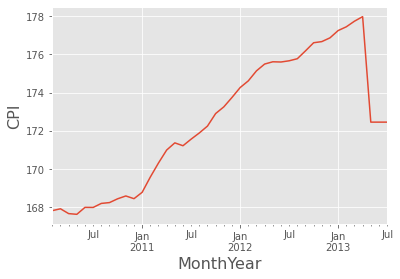

In [184]:
df_Features['CPI'].groupby(df_Features['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.xlabel('MonthYear', fontsize = 16)
plt.ylabel('CPI', fontsize = 16)
plt.show()

### <b>EDA result for second file -

##### - It contains 8190 Rows
##### - It contains 12 Columns/Attributes - <b>Store, Date, Temperature,  Fuel_Price, MarkDown1, MarkDown2,	MarkDown3, MarkDown4,	MarkDown5, CPI, Unemployment, IsHoliday
##### - There are no duplicates
##### - Out if 8190 records, the below attributes have NaN Value -
#####MarkDown1 - 4158
#####MarkDown2 - 5269
#####MarkDown3 - 4577
#####MarkDown4 - 4726
#####MarkDown5 - 4140
#####CPI - 585
#####Unemployment - 585

#### Missing Markdown values filled with 0 and missing CPI and Unemployment values filled with their repective mean values

### <b>Analyzing third csv file - Train.csv

In [185]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [277]:
df_Train = pd.read_csv('train.csv')   #Read csv file and viewing sample data
df_Train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [187]:
df_Train.shape   #Number of Rows and Columns

(421570, 5)

### <b>Plotting affect of holidays on sales

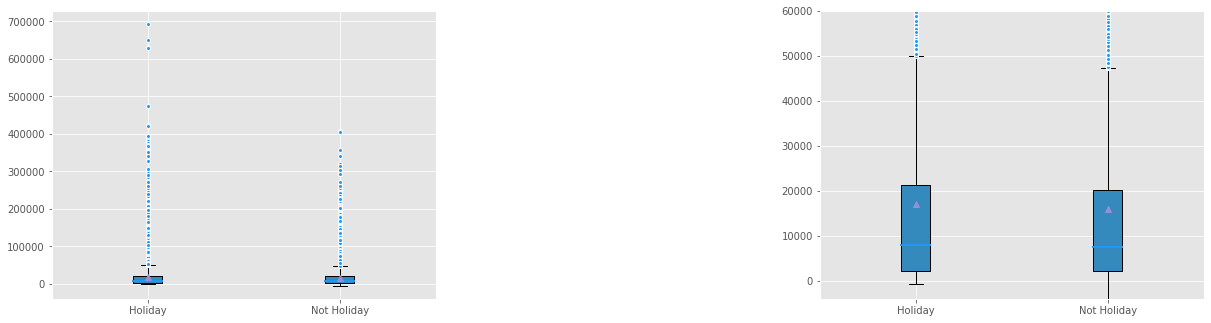

In [188]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
sales_holiday=df_Train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']
#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers
flierprop={'color' : '#12239E',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 4,
          #'linestyle' : 'None',
          'linewidth' : 1}
axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)
axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)
axes[1].set_ylim(-4000,60000)
plt.show()

###<b> Understanding Frequency of Sales for each department via a plot

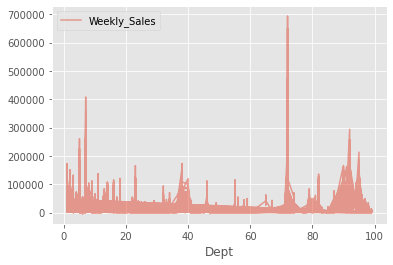

In [189]:
df_Train.plot(kind ='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

### <b>EDA Result on Store Sales
##### - Sales on holidays is a little bit more compared to non-holidays
##### - The Deparment with highest sales lies b/w 60 - 80

### <b>Analyzing fourth csv file - Test.csv

In [190]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [191]:
df_Test = pd.read_csv('test.csv')   #Read csv file and viewing sample data
df_Test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [192]:
df_Test.shape   #Number of Rows and Columns

(115064, 4)

### <b>EDA result for fourth file -

##### - It contains 115064 Rows
##### - It contains 4 Columns/Attributes - <b>Store, Department, Date, IsHoliday

### <b>Merging Stores, Features and Train dataframes/datasets

In [193]:
# Merging Train and Features
df_Train_Features = pd.merge(df_Features, df_Train, on=['Store','Date','IsHoliday'], how='inner')
df_Train_Features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,2,50605.27


In [194]:
# Merging the above dataframe with Stores
df_Train_Features_Stores = pd.merge(df_Train_Features,df_Stores,how='inner',on=['Store'])
df_Train_Features_Stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,5,32229.38,A,151315


### <b>Plotting Correlation between the features

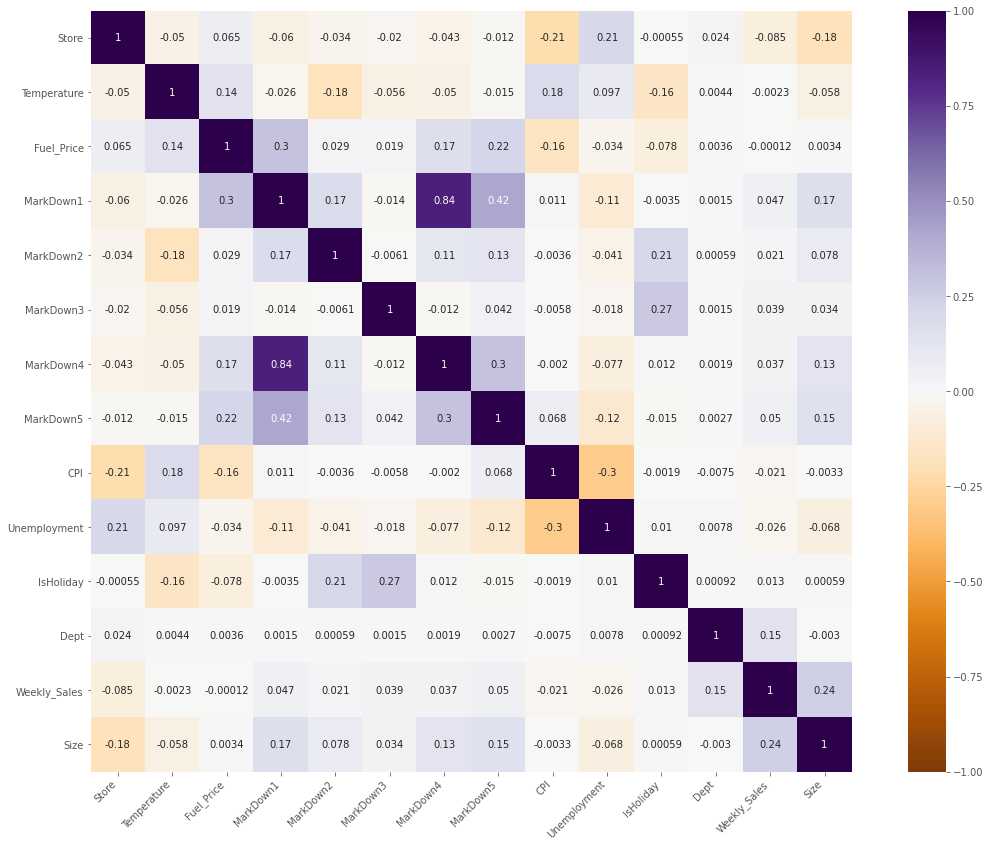

In [195]:
corr = df_Train_Features_Stores.corr()
plt.subplots(figsize=(20,14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='PuOr',
    square=True,
    annot =True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

###<B> Preparing Testing and Training Dataset

####<B> Final Train Dataset

In [0]:
df_Train_Final = df_Train_Features_Stores[['Store','Size','Dept','Temperature','Fuel_Price','CPI', 'Unemployment','MarkDown1','MarkDown2',
                                           'MarkDown3','MarkDown4','MarkDown5','IsHoliday','Date','Weekly_Sales']]
#df_Train_Final.head(2)

In [197]:
#Checking the datatypes
df_Train_Final.dtypes

Store             int64
Size              int64
Dept              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
IsHoliday          bool
Date             object
Weekly_Sales    float64
dtype: object

#### Date and IsHoliday Values need to be modified in order to change their datatype

In [198]:
#Converting Date, from string to datetime
df_Train_Final['Date'] = pd.to_datetime(df_Train_Final['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
#Splitting Date into Days, Month and Year
df_Train_Final["day"] = df_Train_Final['Date'].map(lambda x: x.day)
df_Train_Final["month"] = df_Train_Final['Date'].map(lambda x: x.month)
df_Train_Final["year"] = df_Train_Final['Date'].map(lambda x: x.year)
df_Train_Final.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Date,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,2010-02-05,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,2010-02-05,50605.27,5,2,2010


In [200]:
#Dropping Date Column from the final dataframe
df_Train_Final = df_Train_Final.drop(['Date'], axis=1)
df_Train_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,50605.27,5,2,2010


In [201]:
#Replacing False with 0 and True with 1 for Attribute IsHoliday
df_Train_Final["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
df_Train_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,0,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,0,50605.27,5,2,2010


In [202]:
#Checking the datatypes after conversion
df_Train_Final.dtypes

Store             int64
Size              int64
Dept              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
IsHoliday         int64
Weekly_Sales    float64
day               int64
month             int64
year              int64
dtype: object

####<B> Final Test Dataset

In [203]:
# Merging Test and Features
df_Test_Features = pd.merge(df_Features, df_Test, on=['Store','Date','IsHoliday'], how='inner')
df_Test_Features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,1
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,2


In [204]:
# Merging the above dataframe with Stores
df_Test_Features_Stores = pd.merge(df_Test_Features,df_Stores,how='inner',on=['Store'])
df_Test_Features_Stores.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,1,A,151315
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,2,A,151315


In [205]:
df_Test_Final = df_Test_Features_Stores[['Store','Size','Dept','Temperature','Fuel_Price','CPI', 'Unemployment','MarkDown1','MarkDown2',
                                           'MarkDown3','MarkDown4','MarkDown5','IsHoliday','Date']]
df_Test_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Date
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2012-11-02
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2012-11-02


In [206]:
#Checking the datatypes
df_Test_Final.dtypes

Store             int64
Size              int64
Dept              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
IsHoliday          bool
Date             object
dtype: object

#### The same exists for this dataset, modifying the datatypes for Date and IsHoliday attributes

In [207]:
#Converting Date, from string to datetime
df_Test_Final['Date'] = pd.to_datetime(df_Test_Final['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
#Splitting Date into Days, Month and Year
df_Test_Final["day"] = df_Test_Final['Date'].map(lambda x: x.day)
df_Test_Final["month"] = df_Test_Final['Date'].map(lambda x: x.month)
df_Test_Final["year"] = df_Test_Final['Date'].map(lambda x: x.year)
df_Test_Final.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Date,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2012-11-02,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2012-11-02,2,11,2012


In [209]:
#Dropping Date Column from the final dataframe
df_Test_Final = df_Test_Final.drop(['Date'], axis=1)
df_Test_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012


In [210]:
#Replacing False with 0 and True with 1 for Attribute IsHoliday
df_Test_Final["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
df_Test_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012


In [211]:
#Checking datatypes after conversion
df_Train_Final.dtypes

Store             int64
Size              int64
Dept              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
IsHoliday         int64
Weekly_Sales    float64
day               int64
month             int64
year              int64
dtype: object

In [212]:
display(df_Train_Final.head(2))
display(df_Test_Final.head(2))

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,0,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,0,50605.27,5,2,2010


,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012


##<B> Predictive Modeling: Implementing ML Algorithms

###<b> Preparing Test and Train datasets to use in our ML Models

In [213]:
#Creating x_train with all features, for the model
x_train=df_Train_Final.drop(['Weekly_Sales'], axis=1)
#x_train.head(5)
x_train.shape

(421570, 16)

In [214]:
#Creating y_train with only weekly sales,for the model 
y_train=df_Train_Final['Weekly_Sales']      # Only weekly sales
#y_train.head(5)
y_train.shape

(421570,)

In [215]:
#Creating x_test for the model
x_test = df_Test_Final
x_test.shape

(115064, 16)

In [0]:
#Standardizing the data,  arranging the values to standard normal distribution
std_scalar = StandardScaler()

In [0]:
#Fitting the train and transforming the test data set 
X_train = std_scalar.fit_transform(x_train)
X_test = std_scalar.transform(x_test)

In [0]:
#Creating train-test split
#the test_size here is 20% of the test, the train/test split is usually around 80/20 or 70/30
X_train,X_test,y_train,y_test=train_test_split(X_train, y_train, test_size=0.20, random_state=0)  

In [219]:
#Test and train data shapes after the 80/20 split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (337256, 16)
Training Labels Shape: (337256,)
Testing Features Shape: (84314, 16)
Testing Labels Shape: (84314,)


In [220]:
display(df_Train_Final.head(2))
display(df_Test_Final.head(2))

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,0,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,0,50605.27,5,2,2010


,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012


### <B>Using K-Nearest Neighbor Regression

In [0]:
KNN = KNeighborsRegressor(n_neighbors=5,n_jobs=4)
KNN.fit(X_train,y_train)
y_predicted=KNN.predict(X_test)

<function matplotlib.pyplot.show>

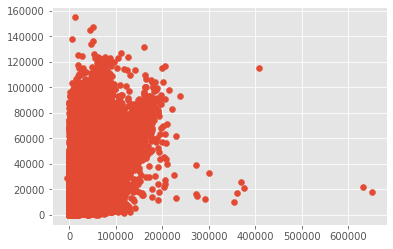

In [222]:
plt.scatter(y_test, y_predicted)
plt.show

##### Calculting Accuracy, RMSE and MAE: KNN

In [0]:
acc_KNN= round(KNN.score(X_train, y_train) * 100,2)

In [0]:
mse_KNN=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_KNN = round(math.sqrt(mse_KNN) *100,2)

In [0]:
mae_KNN = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [226]:
print("Accuracy: ", acc_KNN)
print("RMSE: ", rmse_KNN)
print("MAE: ", mae_KNN)

Accuracy:  49.52
RMSE:  2012640.15
MAE:  1248525.86


In [227]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving KNN_Accuracy.JPG to KNN_Accuracy (1).JPG


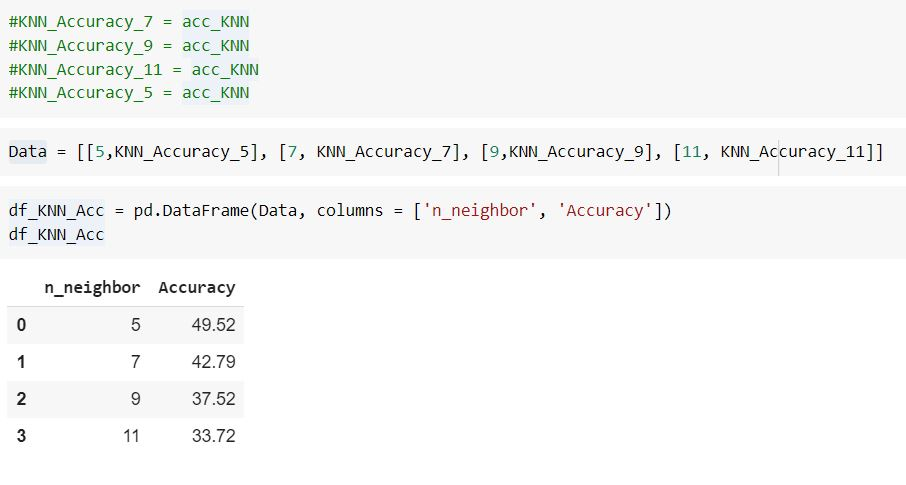

In [228]:
#Image showing Multiple runs of the KNN Model using Diff K Values
Image('KNN_Accuracy.JPG', width =700)

#### The above image is a capture of multiple KNN regression runs, changing the hyper parameter. As we can see the average accuracy is low for the model

###<B> Using Random Forest 

In [0]:
ran_forest = RandomForestRegressor(n_estimators = 100, max_depth= 12, n_jobs=4)        
ran_forest.fit(X_train,y_train)
y_predicted=ran_forest.predict(X_test)

<function matplotlib.pyplot.show>

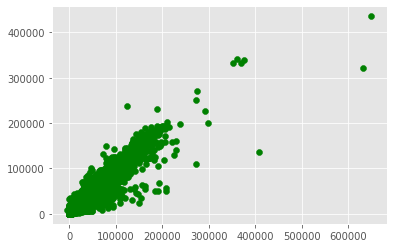

In [230]:
plt.scatter(y_test, y_predicted, color=['green'])
plt.show

##### Calculting Accuracy, RMSE and MAE: Random Forest

In [0]:
mse_ran_forest=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_ran_forest = round(math.sqrt(mse_ran_forest) * 100,2)

In [0]:
acc_ran_forest= round(ran_forest.score(X_train, y_train) * 100,2)

In [0]:
mae_ran_forest = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [234]:
print("Accuracy: ", acc_ran_forest)
print("RMSE: ", rmse_ran_forest)
print("MAE: ", mae_ran_forest)

Accuracy:  94.2
RMSE:  583679.84
MAE:  289729.32


###<B> Using Extra Trees

In [0]:
ex_trees = ExtraTreesRegressor(n_estimators=15,n_jobs=4) 
ex_trees.fit(X_train,y_train)
y_predicted=ex_trees.predict(X_test)

<function matplotlib.pyplot.show>

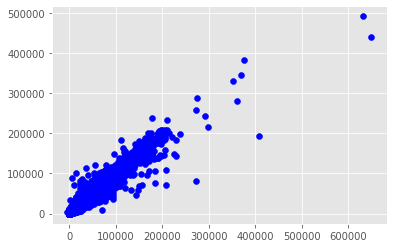

In [236]:
plt.scatter(y_test, y_predicted, color=['blue'])
plt.show

##### Calculting Accuracy, RMSE and MAE: Extra Trees

In [0]:
acc_ex_trees= round(ex_trees.score(X_train, y_train) * 100,2)

In [0]:
mse_ex_trees=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_ex_trees =round(math.sqrt(mse_ex_trees) *100,2)

In [0]:
mae_ex_trees = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [240]:
print("Accuracy: ", acc_ex_trees)
print("RMSE: ", rmse_ex_trees)
print("MAE: ", mae_ex_trees)

Accuracy:  100.0
RMSE:  367627.13
MAE:  143999.63


#### The above model is seemingly over accurate and fitting

###<B> COMPARISON OF MODELS

In [241]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Model_Comparison.JPG to Model_Comparison (1).JPG


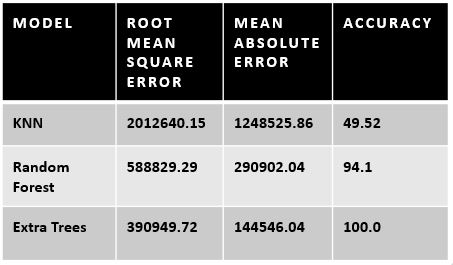

In [242]:
Image('Model_Comparison.JPG', width=400)

#### <B> Comparing the above models (validation metric and accuracy), I decided to pursue with Random Forest and understanding the affects of hyperparameters on the RF Model to create a best fitting one

###<B> Validating the effect of hyperparameters in the RF model 
#### List of hyperparameters for our RF Model, with sample values
##### n_estimators = [100,400,700,1000]
##### max_depth = [4,8,12,16,20]
##### min_samples_split = [2,6,10,14]
##### min_samples_leaf = [1,5,9,13]

#####<b>Checking the effect of n_estimators on the Model

In [0]:
#This takes a lot of time......had to pass this way
# estimator_range = range(100,1000,300)
# estimator_scores = []
# for value in estimator_range:
#   RF_Model = RandomForestRegressor(n_estimators=value)
#   RF_Model.fit(X_train,y_train)
#   scores = round(RF_Model.score(X_train, y_train) * 100,2)
#   estimator_scores.append(scores)
# print(estimator_scores)

In [0]:
RF_Model = RandomForestRegressor(n_estimators=100)
RF_Model.fit(X_train,y_train)       
accuracy_100 = round(RF_Model.score(X_train, y_train) * 100,2)

In [0]:
RF_Model = RandomForestRegressor(n_estimators=400)
RF_Model.fit(X_train,y_train)       
accuracy_400 = round(RF_Model.score(X_train, y_train) * 100,2)

In [0]:
RF_Model = RandomForestRegressor(n_estimators=700)
RF_Model.fit(X_train,y_train)       
accuracy_700 = round(RF_Model.score(X_train, y_train) * 100,2)

In [0]:
print(accuracy_100,accuracy_400, accuracy_700)

99.61 99.62 99.62


#####<b>Checking the effect of max_depth on the Model

In [0]:
depth_range = range(4,22,4)
depth_scores = []

In [247]:
for value in depth_range:
  RF_Model = RandomForestRegressor(max_depth=value)
  RF_Model.fit(X_train,y_train)
  scores = round(RF_Model.score(X_train, y_train) * 100,2)
  depth_scores.append(scores)
print(depth_scores)

[44.69, 81.35, 94.12, 98.45, 99.43]


#####<b>Checking the effect of min_samples_split on the Model

In [0]:
minsplit_range = range(2,16,4)
minsplit_scores = []

In [249]:
for value in minsplit_range:
  RF_Model = RandomForestRegressor(min_samples_split=value)
  RF_Model.fit(X_train,y_train)
  scores = round(RF_Model.score(X_train, y_train) * 100,2)
  minsplit_scores.append(scores)
print(minsplit_scores)

[99.66, 99.34, 98.99, 98.69]


#####<b>Checking the effect of min_samples_leaf on the Model

In [0]:
minleaf_range = range(1,15,4)
minleaf_scores = []

In [251]:
for value in minleaf_range:
  RF_Model = RandomForestRegressor(min_samples_leaf=value)
  RF_Model.fit(X_train,y_train)
  scores = round(RF_Model.score(X_train, y_train) * 100,2)
  minleaf_scores.append(scores)
print(minleaf_scores)

[99.65, 98.55, 97.81, 97.27]


####<B>Plotting effect of Hyperparameters on RF Model Accuracy to avoid Overfitting and Underfitting


---



In [0]:
x_est = [100,400,700]
y_est = [99.61,99.62,99.62]
x_depth = [4,8,12,16,20]
y_depth = [44.69,81.35,94.12,98.45,99.43]
x_minsplit = [2,6,10,14]
y_minsplit = [99.66,99.34,98.99,98.69]
x_minleaf = [1,5,9,13]
y_minleaf = [99.65,98.55,97.81,97.27]

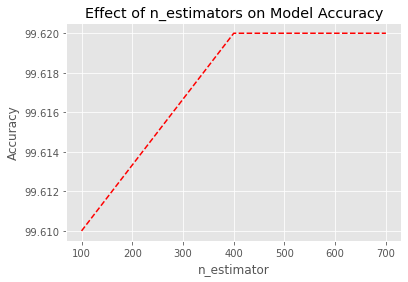

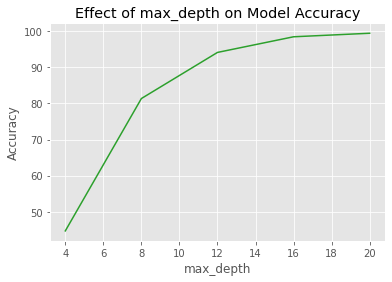

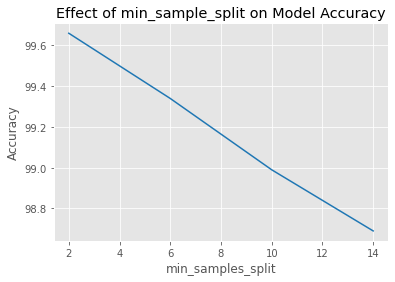

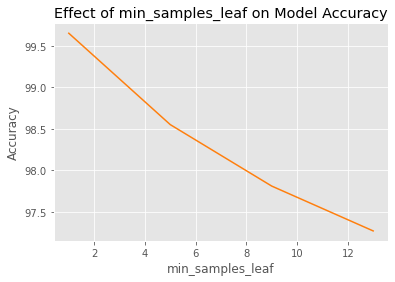

In [254]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

#fig1 --> n_estimators
ax1.plot(x_est,y_est, 'r--')
ax1.set_title('Effect of n_estimators on Model Accuracy')
ax1.set_xlabel('n_estimator')
ax1.set_ylabel('Accuracy')

#fig2 --> max_depth
ax2.plot(x_depth,y_depth,'tab:green')
ax2.set_title('Effect of max_depth on Model Accuracy')
ax2.set_xlabel('max_depth')
ax2.set_ylabel('Accuracy')

#fig3 --> min_samples_split
ax3.plot(x_minsplit,y_minsplit, 'tab:blue')
ax3.set_title('Effect of min_sample_split on Model Accuracy')
ax3.set_xlabel('min_samples_split')
ax3.set_ylabel('Accuracy')

#fig4 --> min_samples_leaf
ax4.plot(x_minleaf,y_minleaf, 'tab:orange')
ax4.set_title('Effect of min_samples_leaf on Model Accuracy')
ax4.set_xlabel('min_samples_leaf')
ax4.set_ylabel('Accuracy')

plt.tight_layout
plt.show()

#min_samples_split

#min_Samples_leaf

#### Seeing from the plots above, it is noted that n_estimators = 100, max_depth =16, min_samples_split = 2, min_samples_leaf =1 are best fitted for our RF Model
######<b>(Please note we set the max_features to auto)

###<B>Final Run of RF Model with most fitting hyperparameter values

In [255]:
RF_Model = RandomForestRegressor(n_estimators = 100,
                                 max_depth =16,
                                 max_features = 'auto',
                                 min_samples_split = 2,
                                 min_samples_leaf =1)       
RF_Model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_predicted=RF_Model.predict(X_test)

<function matplotlib.pyplot.show>

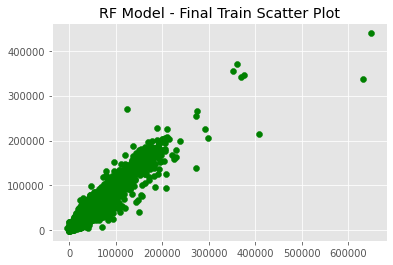

In [257]:
#Scatter Plot for Final Train Run
plt.scatter(y_test, y_predicted, color=['green'])
plt.title('RF Model - Final Train Scatter Plot')
plt.show

##### Calculting Accuracy, RMSE and MAE

In [0]:
acc_RF_Model= round(RF_Model.score(X_train, y_train) * 100,2)

In [0]:
mse_RF_Model=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_RF_Model = round(math.sqrt(mse_RF_Model) * 100,2)

In [0]:
mae_RF_Model = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [261]:
print("Accuracy: ", acc_RF_Model)
print("RMSE: ", rmse_RF_Model)
print("MAE: ", mae_RF_Model)

Accuracy:  98.45
RMSE:  403486.49
MAE:  174836.34


###<B>Using Final RF Model to Predict the sales For Full Test Data


In [0]:
#Creating Full Datasets to train with (100% of train data)
x_train=df_Train_Final.drop(['Weekly_Sales'], axis=1)
y_train=df_Train_Final['Weekly_Sales']
x_test = df_Test_Final

In [263]:
print('Training Features Shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Training Features Shape: ', x_test.shape)

Training Features Shape:  (421570, 16)
Train labels shape:  (421570,)
Training Features Shape:  (115064, 16)


In [264]:
RF_Model = RandomForestRegressor(n_estimators = 100,
                                 max_depth =16,
                                 max_features = 'auto',
                                 min_samples_split = 2,
                                 min_samples_leaf =1)       
RF_Model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_predicted=RF_Model.predict(x_test)

##### Calculting Accuracy, RMSE and MAE

In [266]:
acc_RF_Model= round(RF_Model.score(x_train, y_train) * 100,2)
print("Accuracy: ", acc_RF_Model)

Accuracy:  98.39


###<B> Plotting Actual Vs Predicted

###Creating the predicted dataset

In [267]:
display(x_test.head(2))

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,0,2,11,2012


In [268]:
#Converting Values Of Isholiday back to original format
x_test["IsHoliday"].replace({0: False, 1: False}, inplace=True)
x_test.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012


In [269]:
#Converting Values Of Date back to original format
x_test["Date"] = pd.to_datetime(x_test[['year', 'month', 'day']])
x_test.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year,Date
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012,2012-11-02
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012,2012-11-02


In [270]:
#Load values into the Predicted Dataframe
df_predicted = pd.DataFrame({
    "Store": x_test.Store,
    "Dept":x_test.Dept,
    "Date": x_test.Date,
    "IsHoliday": x_test.IsHoliday,
    "Weekly_Sales": y_predicted,
    })
df_predicted.head(2)

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,27362.874424
1,1,2,2012-11-02,False,46932.834067


In [275]:
#Rounding Off Weekly Sales to 2 decimals
df_predicted["Weekly_Sales"] = df_predicted['Weekly_Sales'].round(decimals=2)
display(df_predicted.head(2))
display(df_predicted.tail(2))

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,27362.87
1,1,2,2012-11-02,False,46932.83


,Store,Dept,Date,IsHoliday,Weekly_Sales
115062,45,97,2013-07-26,False,6401.12
115063,45,98,2013-07-26,False,58.96


###Grouping by the Month and Year to compare Average of Existing and Predicted Sales

In [278]:
#Displaying the train and predicted datasets
display(df_Train.head(2))
display(df_predicted.head(2))

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,27362.87
1,1,2,2012-11-02,False,46932.83


In [0]:
df_Train["MonthYear"] = pd.to_datetime(df_Train['Date']).dt.to_period('M')

In [0]:
df_predicted["MonthYear"] = pd.to_datetime(df_predicted['Date']).dt.to_period('M')

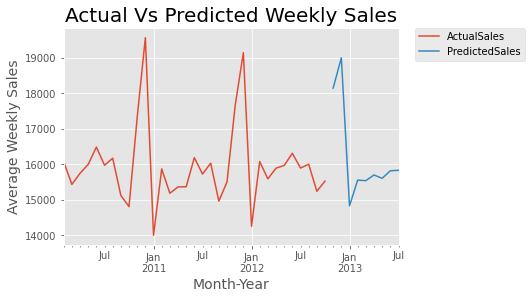

In [281]:
df_Train['Weekly_Sales'].groupby(df_Train['MonthYear']).mean().plot(kind = "line",rot = 0)
df_predicted['Weekly_Sales'].groupby(df_predicted['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.title('Actual Vs Predicted Weekly Sales', fontsize = 20)
plt.xlabel('Month-Year', fontsize = 14)
plt.ylabel('Average Weekly Sales', fontsize = 14)
plt.legend(["ActualSales", "PredictedSales"],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

####Loading new Test File with Predicted Sale Values (OPTIONAL)

In [0]:
#df_predicted.to_csv('D:\606 - Capstone\PredictedFile\test_predicted.csv', index=False, header = True)

##<B> THE END

In [282]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving thankyou.jpg to thankyou (1).jpg


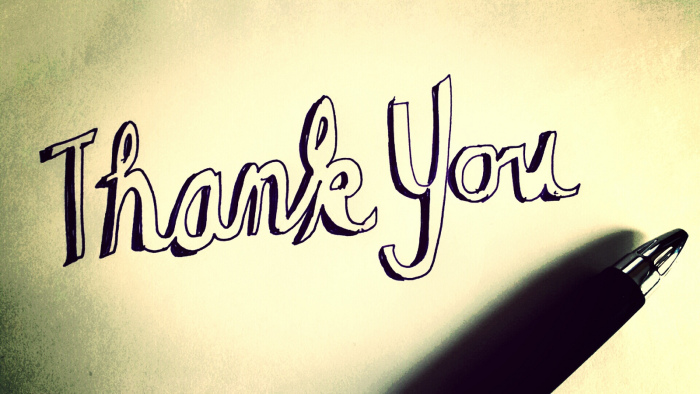

In [283]:
Image('thankyou.jpg', width=800)